In [1]:
# required stuff
import sys
sys.path.insert(1, '/Users/samuelcourville/Documents/JPL/combinedModel/thermal')
sys.path.insert(1, '/Users/samuelcourville/Documents/JPL/combinedModel/aqueous')
sys.path.insert(1, '/Users/samuelcourville/Documents/JPL/combinedModel/transport')
sys.path.insert(1, '/Users/samuelcourville/Documents/JPL/combinedModel/rock')
sys.path.insert(1, '/Users/samuelcourville/Documents/JPL/combinedModel/tables')
import matplotlib.pyplot as plt
import numpy as np

# Import WOW!

In [2]:
# import WOW (WOW! Ocean Worlds)
import WOW

# Create model 

In [3]:
######### define grid ##############

nr = 51       # Number of radii
maxnt = 1000  # Maximum number of time steps

YR = 3.1536E7            #(Year to seconds conversion)
StartTime=3.0*10**6*YR   # Myrs
EndTime = 4567*10**6*YR  # Myrs. Stop time if maxnt is not reached Myr
Radius = 580000          # meters


Ceres = WOW.Planet(nr,StartTime,EndTime,Radius,maxnt)

# Initialize model composition

In [4]:
########### initialize comp ############


# Starting temperature
init_Temp = 100


# parameters for perplex grid
temp_step = 25 # how many degrees temperature difference before recalculating thermal properties? 
press_step= 10 #


# Starting composition (Mass fraction, must sum to 1)
init_IceComp={'H2O':0.5} #,'NH3':0.1, 'CO2'}
init_RockComp={"H":3.333,"C":0.00,"Mg":32.6277,"Al":0.00,"Si":15.5176,"S":0.00,"Ca":0.00,"Fe":5.0295,"O":43.4922,"Na":0.00,"N":0.00}




# Debugging check
sumR=0
for key in init_RockComp:    
    sumR = sumR+init_RockComp[key]
    init_RockComp[key] *= (0.5/100)
print(sumR)
#init_RockComp={'F':0.15,'Q':0.15,'P':0.1,'N':0.005,'K':0.005,'L':0.01,'C':0.03,'S':0.05}
#init_RockComp={'F':0.04,'Q':0.046,'P':0.048,'N':0.0005,'K':0.0001,'L':0.001,'C':0.003,'S':0.02}
#init_RockComp={"H":11.283,"C":26.814,"Mg":0.985,"Al":0.178,"Si":10.434,"S":1.789,"Ca":0.082,"Fe":6.035,"O":40.652,"Na":0.696,"N":1.052}




# Initial radioisotope abundance
init_Radio={'Al26':8370*10**-6*5*10**-5,'K40':12*559*10**-6*0.0119/100,'U235':0.71/100*0.00816*10**-6,
            'U238':99.28/100*0.00816*10**-6,'Th232':0.0298*10**-6}



# Starting properties
init_rho=1700 #2000.0
init_K=3.6 #2.0
init_Cp= 1444#2090.0


Ceres.initialize_comp(init_IceComp,init_RockComp, init_Radio, init_Temp,init_rho,init_K,init_Cp,temp_step,press_step)

100.0


# Run Model

In [5]:
Ceres.runModel()

Step 0 out of 1000
Step 100 out of 1000
Step 200 out of 1000
Step 300 out of 1000
Step 400 out of 1000
Step 500 out of 1000
Step 600 out of 1000
Perplex failed on input:
{'H': -0.0005977486434541696, 'C': 0.0, 'Mg': 34.748949427994646, 'Al': 0.0, 'Si': 16.52645750830886, 'S': 0.0, 'Ca': 0.0, 'Fe': 5.3564867014254345, 'O': 43.3687041109145, 'Na': 0.0, 'N': 0.0}
Perplex failed on input:
{'H': -0.0004110507584102845, 'C': 0.0, 'Mg': 34.76031984369004, 'Al': 0.0, 'Si': 16.531865231274242, 'S': 0.0, 'Ca': 0.0, 'Fe': 5.358239430111194, 'O': 43.349986545682945, 'Na': 0.0, 'N': 0.0}
Step 700 out of 1000
Perplex failed on input:
{'H': -0.0004110507584102843, 'C': 0.0, 'Mg': 34.76031984369003, 'Al': 0.0, 'Si': 16.531865231274235, 'S': 0.0, 'Ca': 0.0, 'Fe': 5.358239430111192, 'O': 43.34998654568293, 'Na': 0.0, 'N': 0.0}
Perplex failed on input:
{'H': -0.0005977486434541697, 'C': 0.0, 'Mg': 34.74894942799465, 'Al': 0.0, 'Si': 16.526457508308862, 'S': 0.0, 'Ca': 0.0, 'Fe': 5.356486701425435, 'O': 4

# Plot results!

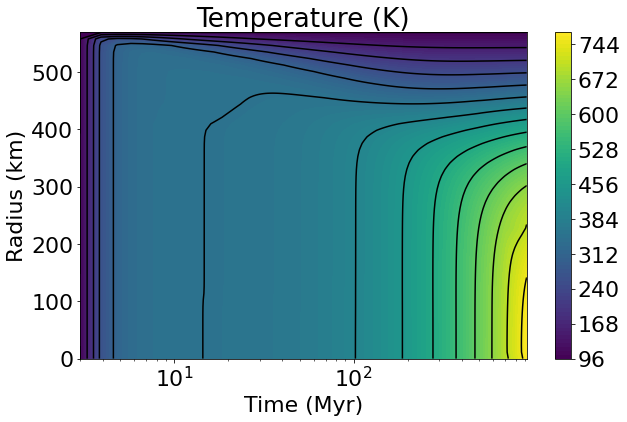

In [28]:
Ceres.plotAttribute("Temp","Temperature (K)")
plt.xscale("log")

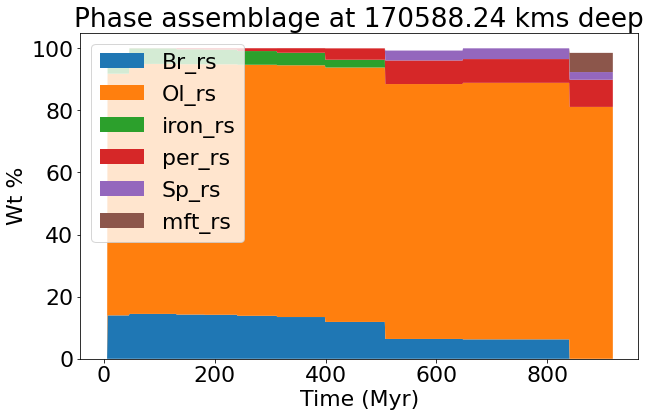

In [7]:
Ceres.plotPhaseAssemblage(36)

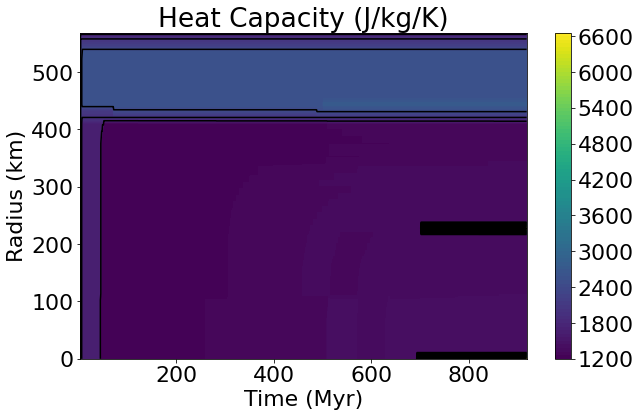

In [8]:
Ceres.plotAttribute("Cp","Heat Capacity (J/kg/K)")

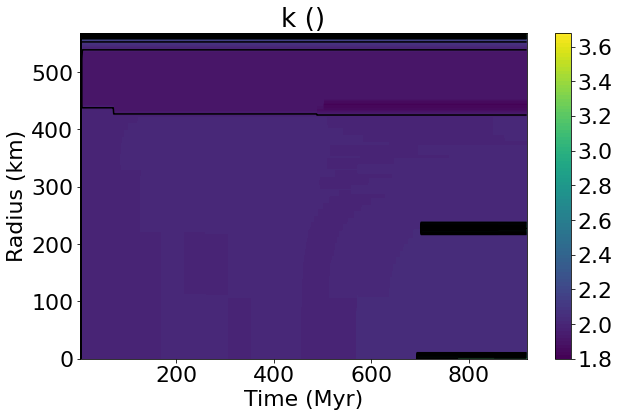

In [9]:
Ceres.plotAttribute("TCond","k ()")

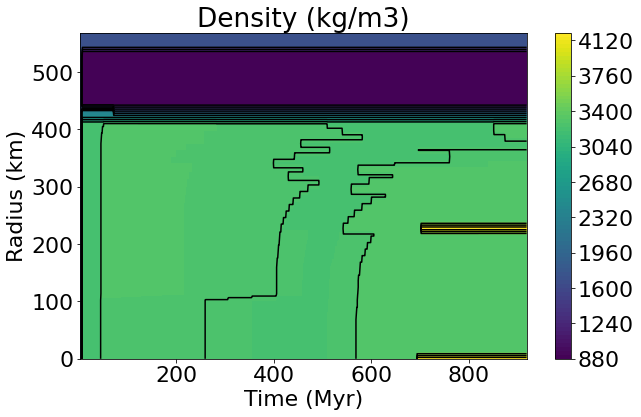

In [10]:
Ceres.plotAttribute("Dens","Density (kg/m3)")

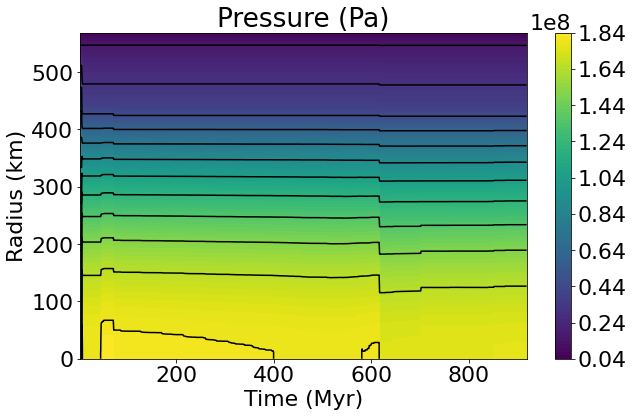

In [11]:
Ceres.plotAttribute("Press","Pressure (Pa)")

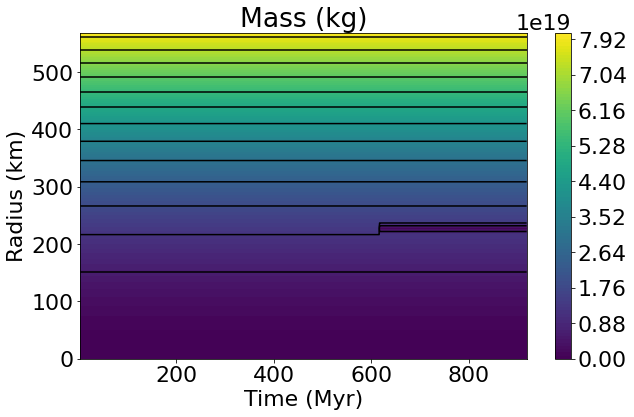

In [12]:
Ceres.plotAttribute("Mass","Mass (kg)")

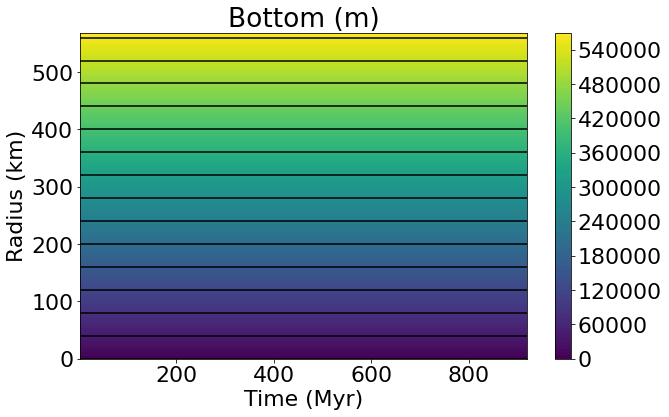

In [13]:
Ceres.plotAttribute("Bot","Bottom (m)")

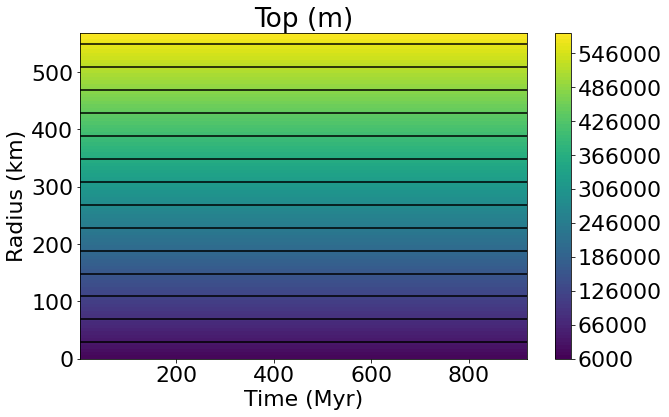

In [14]:
Ceres.plotAttribute("Top","Top (m)")

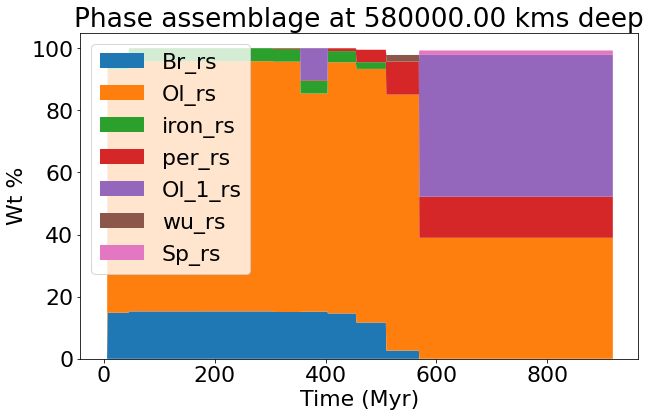

In [15]:
Ceres.plotPhaseAssemblage(0)

In [16]:
print(Ceres.grid[150,0].RockPhaseDat[1])

{'mass': 80.52, 'wt%': 80.52, 'vol%': 77.8, 'mol%': 62.76, 'mol': 0.569, 'H': 0.0, 'C': 0.0, 'Mg': 33.818, 'Al': 0.0, 'Si': 19.831, 'S': 0.0, 'Ca': 0.0, 'Fe': 1.161, 'O': 45.19, 'Na': 0.0, 'N': 0.0, 'N(g)': 141.62, 'G(J)': -2160024.0, 'S(J/K)': 215.96, 'V(J/bar)': 4.4213, 'Cp(J/K)': 161.89, 'Alpha(1/K)': 3.6668e-05, 'Beta(1/bar)': 8.1457e-07, 'Cp/Cv': 1.032, 'Density(kg/m3)': 3203.1, 'Gruneisen_T': 1.2688, 'Ks(bar)': 1266900.0, 'Mu(bar)': 422310.0, 'V0(km/s)': 6.2891, 'Vp(km/s)': 7.5586, 'Vs(km/s)': 3.631, 'Poisson_ratio': 0.35, 'Enthalpy (J/kg)': 0.0, 'Specific Enthalpy (J/m3)': 0.0, 'Entropy (J/K/kg)': 0.0, 'Specific Entropy (J/K/m3)': 0.0, 'Heat Capacity (J/K/kg)': 0.0, 'Specific Heat Capacity (J/K/m3)': 0.0}


In [17]:
#for i in range(0,1500):
#    if not Ceres.grid[i,1].RockPhaseDat:
#        print(Ceres.grid[i,0].RockPhaseDat)
#        print(i)
        
print(Ceres.grid[170,0].RockPhases)
print(Ceres.grid[170,0].RockPhaseDat[1])

['Br_rs' 'Ol_rs' 'iron_rs' 'Bulk_rs']
{'mass': 80.52, 'wt%': 80.52, 'vol%': 77.8, 'mol%': 62.76, 'mol': 0.569, 'H': 0.0, 'C': 0.0, 'Mg': 33.818, 'Al': 0.0, 'Si': 19.831, 'S': 0.0, 'Ca': 0.0, 'Fe': 1.161, 'O': 45.19, 'Na': 0.0, 'N': 0.0, 'N(g)': 141.62, 'G(J)': -2160024.0, 'S(J/K)': 215.96, 'V(J/bar)': 4.4213, 'Cp(J/K)': 161.89, 'Alpha(1/K)': 3.6668e-05, 'Beta(1/bar)': 8.1457e-07, 'Cp/Cv': 1.032, 'Density(kg/m3)': 3203.1, 'Gruneisen_T': 1.2688, 'Ks(bar)': 1266900.0, 'Mu(bar)': 422310.0, 'V0(km/s)': 6.2891, 'Vp(km/s)': 7.5586, 'Vs(km/s)': 3.631, 'Poisson_ratio': 0.35, 'Enthalpy (J/kg)': 0.0, 'Specific Enthalpy (J/m3)': 0.0, 'Entropy (J/K/kg)': 0.0, 'Specific Entropy (J/K/m3)': 0.0, 'Heat Capacity (J/K/kg)': 0.0, 'Specific Heat Capacity (J/K/m3)': 0.0}


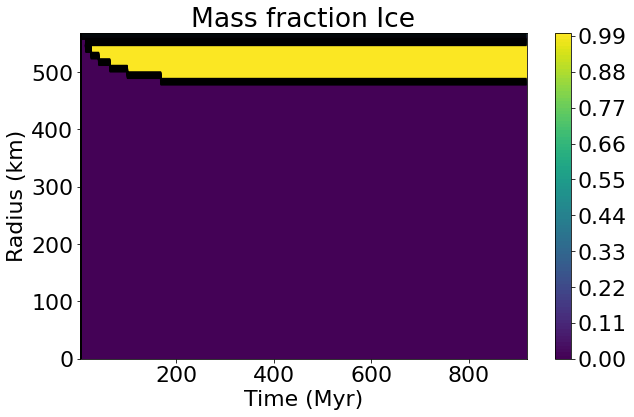

In [18]:
Ceres.plotDictAttributeMassScaled("IceComp","H2O","Mass fraction Ice",0,1)

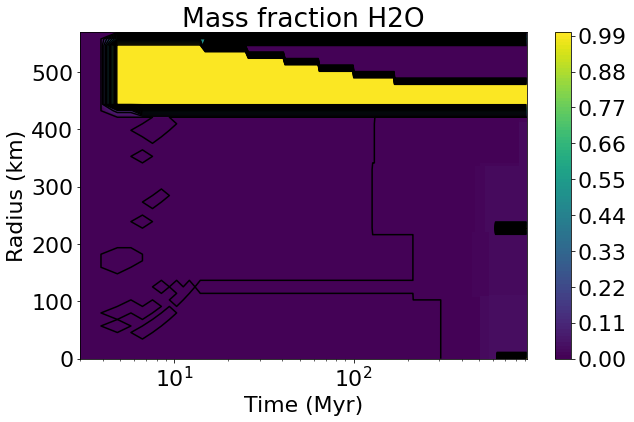

In [29]:
Ceres.plotDictAttributeMassScaled("AqComp","H2O","Mass fraction H2O",0,1)
plt.xscale("log")

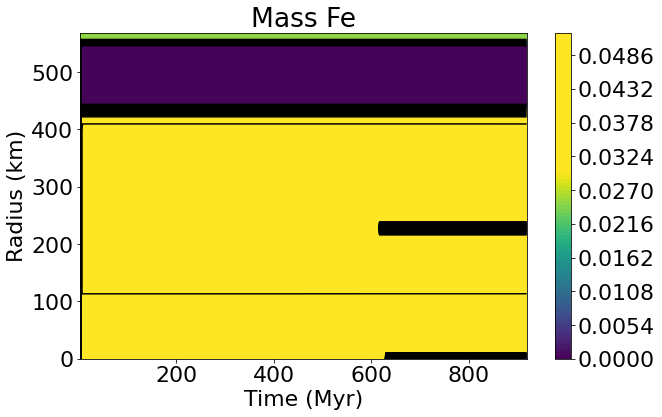

In [20]:
Ceres.plotDictAttributeMassScaled("RockComp","Fe","Mass Fe",0,0.03)

In [21]:
Ceres.grid[199,24].RockMass

1.8861718730093912e+19

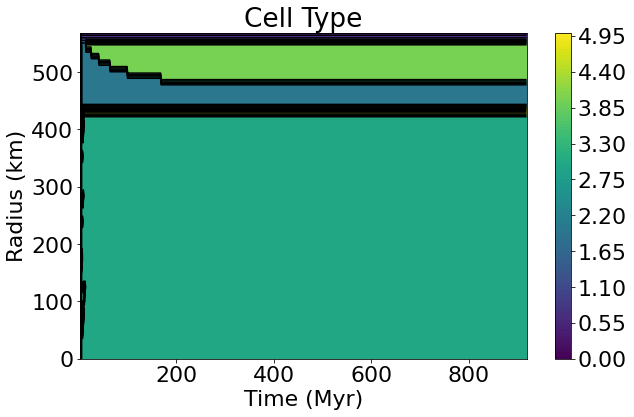

In [22]:
Ceres.plotAttribute("Celltype","Cell Type")

In [23]:
Ceres.grid[100,0].RockPhaseDat

[{'mass': 15.259999999999998,
  'wt%': 15.26,
  'vol%': 20.44,
  'mol%': 28.86,
  'mol': 0.261,
  'H': 3.453,
  'C': 0.0,
  'Mg': 41.574,
  'Al': 0.0,
  'Si': 0.0,
  'S': 0.0,
  'Ca': 0.0,
  'Fe': 0.15,
  'O': 54.822,
  'Na': 0.0,
  'N': 0.0,
  'N(g)': 58.37,
  'G(J)': -917542.0,
  'S(J/K)': 138.6,
  'V(J/bar)': 2.5226,
  'Cp(J/K)': 107.57,
  'Alpha(1/K)': 9.0656e-05,
  'Beta(1/bar)': 2.8147e-06,
  'Cp/Cv': 1.0475,
  'Density(kg/m3)': 2313.8,
  'Gruneisen_T': 0.79121,
  'Ks(bar)': 372170.0,
  'Mu(bar)': 124060.0,
  'V0(km/s)': 4.0106,
  'Vp(km/s)': 4.8201,
  'Vs(km/s)': 2.3155,
  'Poisson_ratio': 0.35,
  'Enthalpy (J/kg)': 0.0,
  'Specific Enthalpy (J/m3)': 0.0,
  'Entropy (J/K/kg)': 0.0,
  'Specific Entropy (J/K/m3)': 0.0,
  'Heat Capacity (J/K/kg)': 0.0,
  'Specific Heat Capacity (J/K/m3)': 0.0},
 {'mass': 80.52,
  'wt%': 80.52,
  'vol%': 77.82,
  'mol%': 62.76,
  'mol': 0.569,
  'H': 0.0,
  'C': 0.0,
  'Mg': 33.816,
  'Al': 0.0,
  'Si': 19.831,
  'S': 0.0,
  'Ca': 0.0,
  'Fe': 1.164

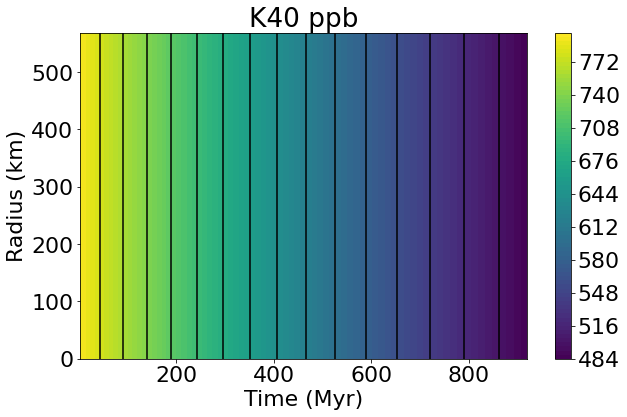

In [24]:
Ceres.plotDictAttribute("RIComp","K40","K40 ppb",10**9)

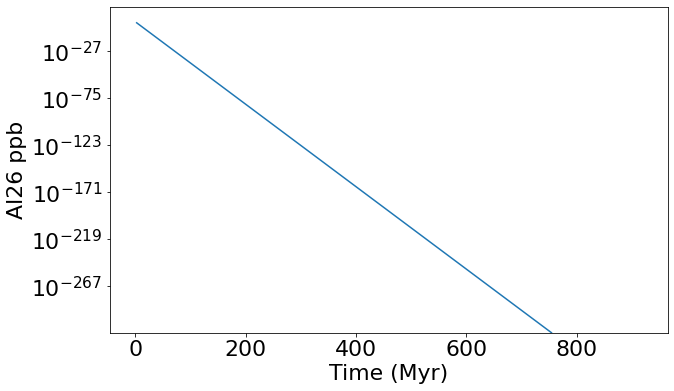

In [25]:
testPlot = Ceres.plotDictAttributeLine("RIComp","Al26","Al26 ppb",0,10**9)
#plt.xlim([2,12])
plt.yscale('log')

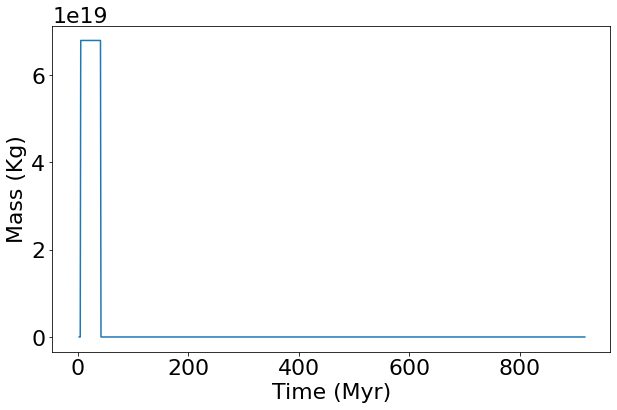

In [26]:
Ceres.plotAttributeLine("AqMass","Mass (Kg)",46)
#plt.xlim([2,12])

In [27]:
H=1.0
C=12.01
N=14.01
O=16
Na=22.99
Mg=24.31
Al=26.98
Si=28.09
S=32.07
Cl=35.45
K=39.10
Ca=40.08
Mn=54.94
Fe=55.85
Ni=58.69